In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# My modules:
# from libs.EnvironmentCustomReward import StockEnv
from libs.Environment import StockEnv
from libs.Agent import StockTradingAgent
from libs.ETL import ETLclass

import tensorboardX

In [2]:
etl = ETLclass('SAN.MC')

train_df, val_df, test_df = etl.train_df, etl.val_df, etl.test_df
scaled_train_df, scaled_val_df, scaled_test_df = etl.scaled_train_tensor, etl.scaled_val_tensor, etl.scaled_test_tensor 

In [3]:
# Create an instance of the environment and the agent
env = StockEnv(train_df, transaction_rate=0)
val_env = StockEnv(val_df, transaction_rate=0)
agent = StockTradingAgent(env, val_env)

In [4]:
# Training the agent
agent.train(total_timesteps=30000, trial=98)

Output()

100%|██████████| 100/100 [00:24<00:00,  4.00it/s]


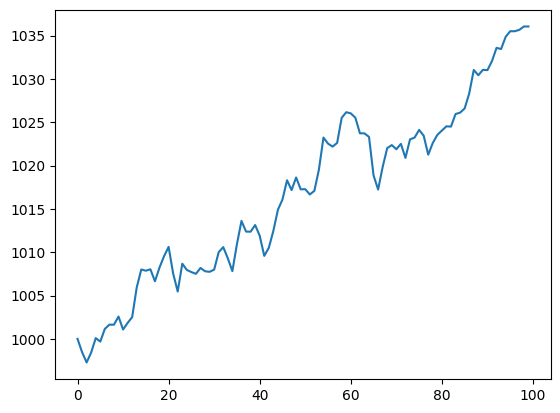

Average Return in 100 days: 3.6046 %


In [6]:
val_tensor = []
val_period = 100
for i in tqdm(range(100)):
    epiosode_infos, actions = agent.evaluate(steps=val_period)
    net_worth = [epiosode_infos[i][0]['net_worth'] for i in range(len(epiosode_infos))]
    val_tensor.append(net_worth)
val_tensor = np.array(val_tensor)

val_vector = val_tensor.mean(axis=0)

plt.plot(val_vector)
plt.show()

print(f'Average Return in {val_period} days: {(val_vector[-1]-val_vector[0])/val_vector[0]*100:.4f} %')